In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
len(np.unique(y_train))

10

In [4]:
print('X_train shape : ',X_train.shape)
print('X_test shape  : ',X_test.shape)
print('y_train shape : ',y_train.shape)
print('y_test shape  : ',y_test.shape)

X_train shape :  (50000, 32, 32, 3)
X_test shape  :  (10000, 32, 32, 3)
y_train shape :  (50000, 1)
y_test shape  :  (10000, 1)


In [5]:
input_shape = (X_train.shape[1],X_train.shape[2],3)
input_shape

(32, 32, 3)

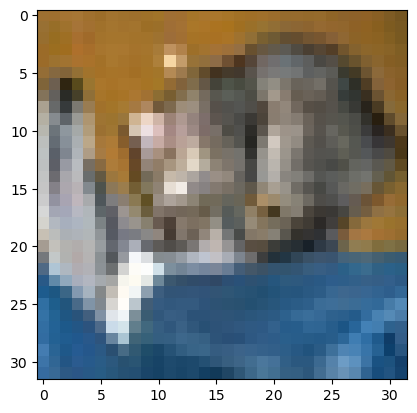

In [6]:
plt.imshow(X_test[0])

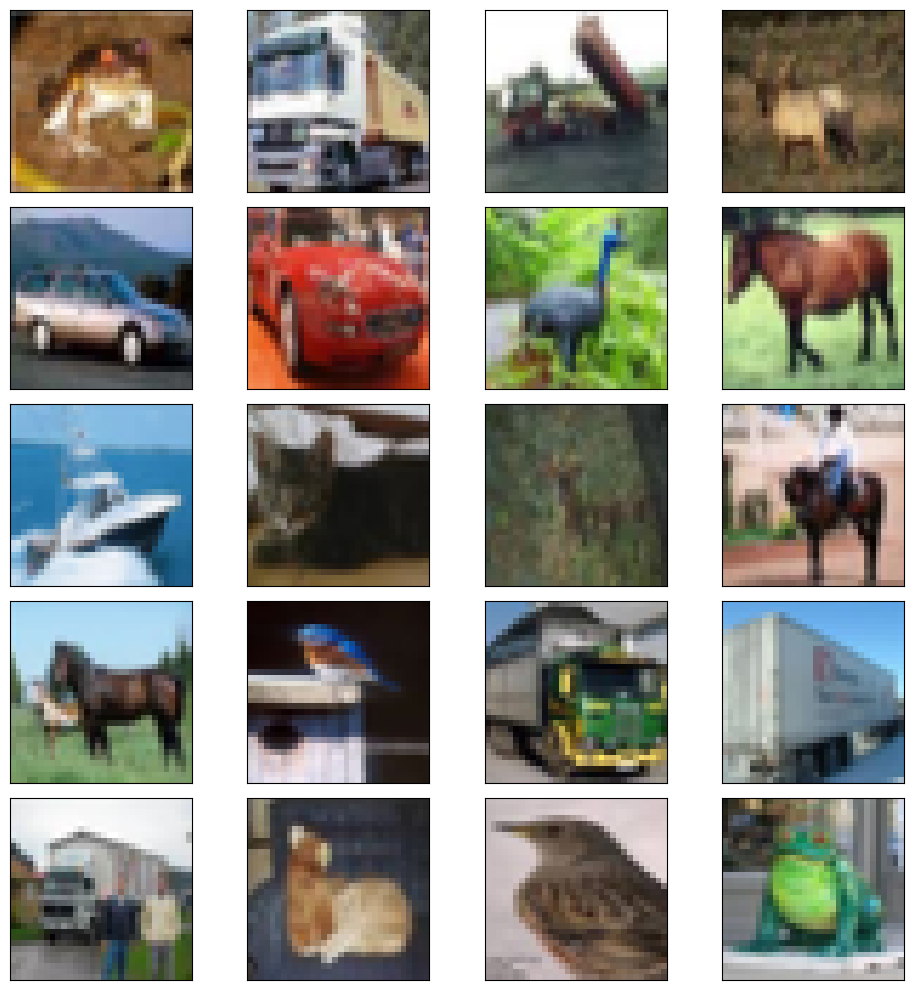

In [7]:
plt.figure(figsize = (10,10));
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()    

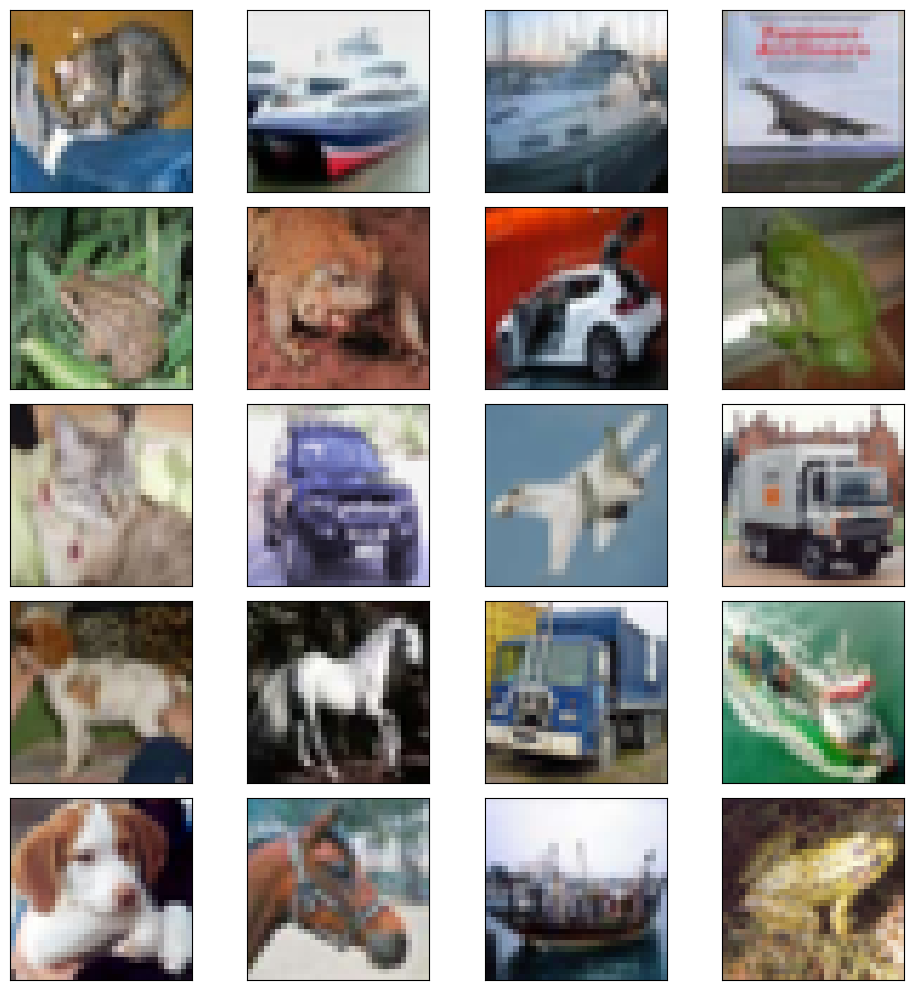

In [8]:
plt.figure(figsize = (10,10));
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()   

In [9]:
# Scale
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [10]:
# One Hot Encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [11]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (input_shape), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = (input_shape), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = (2,2)))


model.add(Conv2D(filters = 128, kernel_size = (3,3), input_shape = (input_shape), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = (2,2)))

model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(rate = 0.2))

model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.2))

model.add(Dense(units = 10, activation = 'softmax'))


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,818 (655.54 KB)

 Trainable params: 167,818 (655.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'acc'])

In [14]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10, verbose = 1, mode = 'min')]

In [15]:
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test), callbacks = callbacks)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - acc: 0.2881 - loss: 1.8812 - precision: 0.5515 - recall: 0.0776 - val_acc: 0.5218 - val_loss: 1.3305 - val_precision: 0.7377 - val_recall: 0.2866
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - acc: 0.5359 - loss: 1.2966 - precision: 0.7210 - recall: 0.3429 - val_acc: 0.5765 - val_loss: 1.1914 - val_precision: 0.7271 - val_recall: 0.4241
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - acc: 0.6063 - loss: 1.1224 - precision: 0.7584 - recall: 0.4471 - val_acc: 0.6327 - val_loss: 1.0490 - val_precision: 0.7546 - val_recall: 0.5150
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - acc: 0.6515 - loss: 0.9943 - precision: 0.7837 - recall: 0.5204 - val_acc: 0.6484 - val_loss: 1.0150 - val_precision: 0.7781 - val_recall: 0.5193
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - acc: 0.6872 - loss: 0.9083 - precision: 0.8012 - recall: 0.5684 - val_acc: 0.6656 - val_loss: 0.9417 - val_precision: 0.7847 -

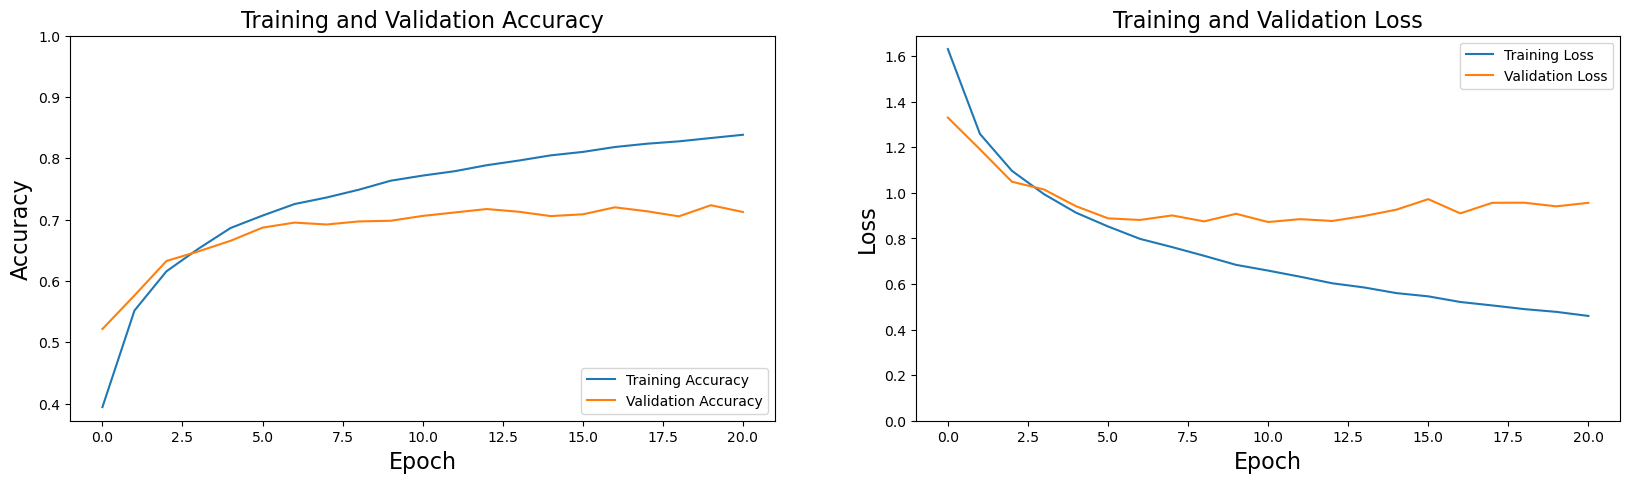

In [16]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt. legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy', fontsize=16)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt. legend (loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss', fontsize=16)
plt.show()

In [17]:
loss, precision, recall, acc = model.evaluate(X_test, y_test)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))
print("\nTest loss: %.1f%%" % (100.0 * loss))
print("\nTest precision: %.1f%%" % (100.0 * precision))
print("\nTest recall: %.1f%%" % (100.0 * recall))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7087 - loss: 0.9487 - precision: 0.7595 - recall: 0.6715

Test accuracy: 71.3%

Test loss: 95.6%

Test precision: 76.4%

Test recall: 67.3%


In [18]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [19]:
print(y_test.shape)
print(y_pred.shape)

(10000, 10)
(10000, 10)


In [20]:
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [21]:
cm = confusion_matrix(y_test, y_pred)

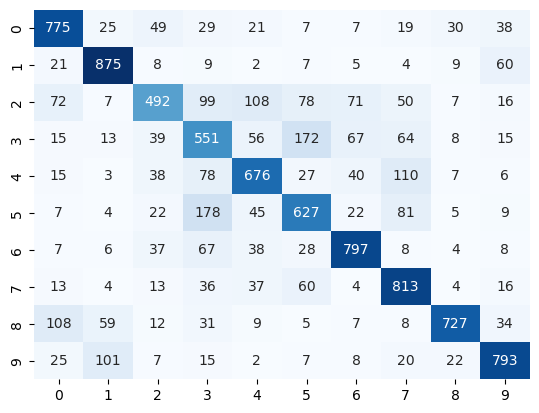

In [22]:
sns.heatmap(cm, cmap= 'Blues', fmt='d', annot=True, cbar=False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


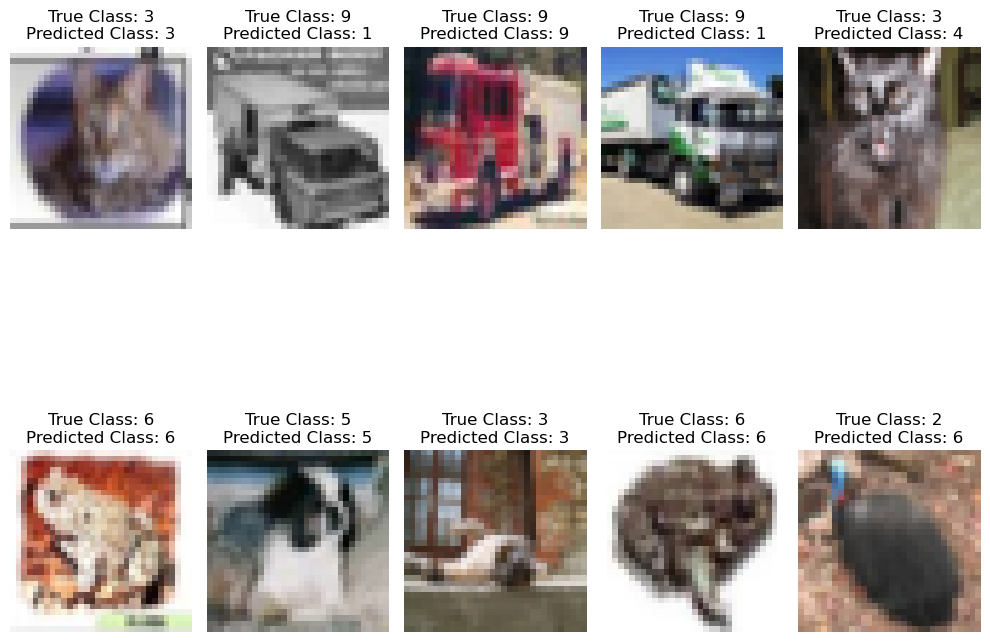

In [23]:
plt.figure(figsize = (10,10))

for i in range(10):
    random_index = np.random.randint(0, len(X_test))
    random_image = X_test[random_index]
    predicted_class = np.argmax(model.predict(random_image.reshape(1, 32, 32, 3)), axis=1)[0]

    plt.subplot(2, 5, i + 1)
    plt.imshow(random_image)
    plt.title(f'True Class: {y_test[random_index]}\nPredicted Class: {predicted_class}')
    plt.axis("off")
plt.tight_layout()
plt.show()